<div style="display:flex; align-content: center; margin-bottom: 1em">
    <div>
        <div style="display:flex; align-content: center; margin-bottom: 1em">
            <img src="./geopozo-logo.svg">
            <h1 style="margin:0; margin-left:0.5em;">Análisis Básico de Pozos!</h1>
        </div>
        Una prevista pequeña de nuestro curso</br>
        y nuestro software.
        <h2>Saladin, Australia --></h2>
    </div>
    <img src="./ausgeobasin.jpg" style="width: 15em; height: auto">
</div>

## Visualizar Las Propriedades Geofísicas ↓

* conductividad
* radioactividad
* densidad

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

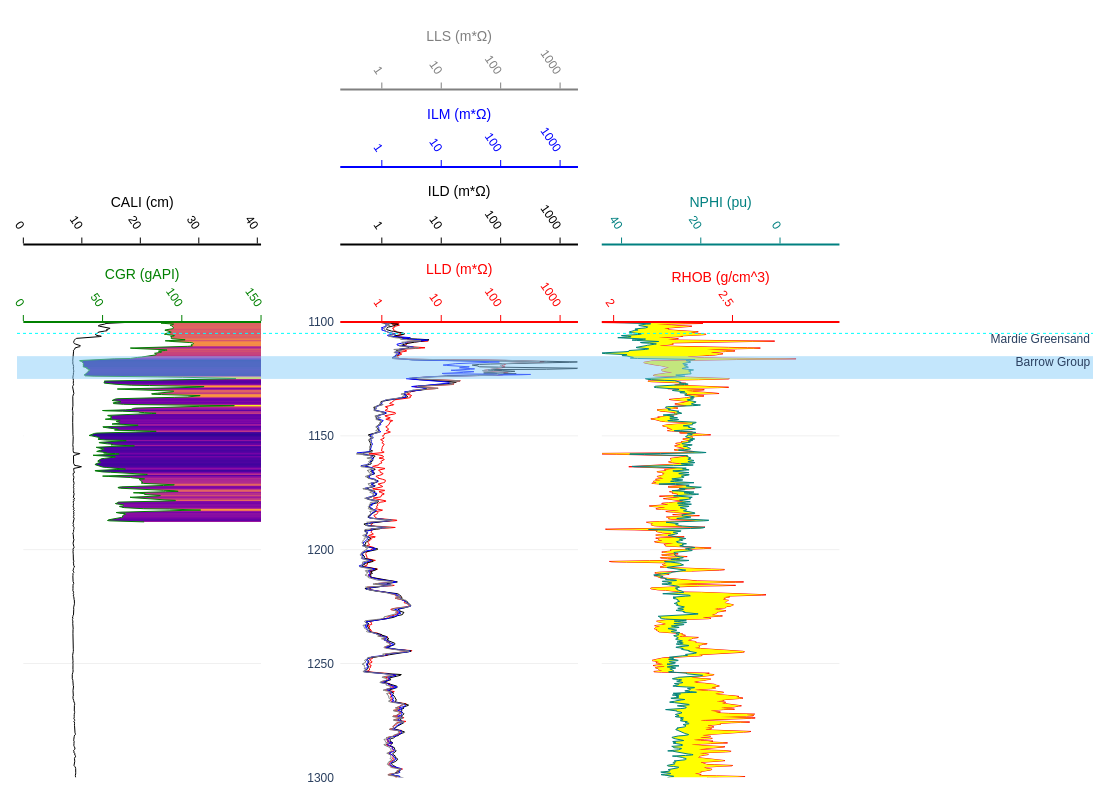

In [3]:
import itertools
import lasio
import pozo
import plotly.graph_objects as go

# abrir archivo LAS
las = lasio.read("https://raw.githubusercontent.com/geopozo/pozo-demo/main/SALADIN.LAS")

# hacer grupos de sensores
vias = (["CGR", "CALI"], ["LLD", "ILD", "ILM", "LLS"], ["RHOB", "NPHI"])

# inicializar 
grafico = pozo.Graph(las,  yaxis_name="DEPT:1", include=list(itertools.chain(*tracks)))

# poner tema
grafico.set_theme("cangrejo")
grafico.get_theme().set_fallback("track_width", 150)
for grupo in vias:
    grafico.combine_tracks(*grupo)
grafico.get_trace("RHOB").set_theme({"cross_axis_fill": "some name"})
grafico.get_trace("NPHI").set_theme({"cross_axis_fill": ("some name", {}), "fillcolor": "yellow"})
grafico.get_trace("CGR").set_theme({"fill": 'heatmap'})

# agregar notas
grafico.note_dict['Mardie Greensand'] = pozo.Note(1105, line=dict(color="#00FFFF"), text='Mardie Greensand')
grafico.note_dict['Barrow Group'] = pozo.Note((1115, 1125), line=dict(color="green"), text='Barrow Group')

# renderizar
go.Figure(graph.render(height=800, depth_position=1, depth=[1100, 1300],))

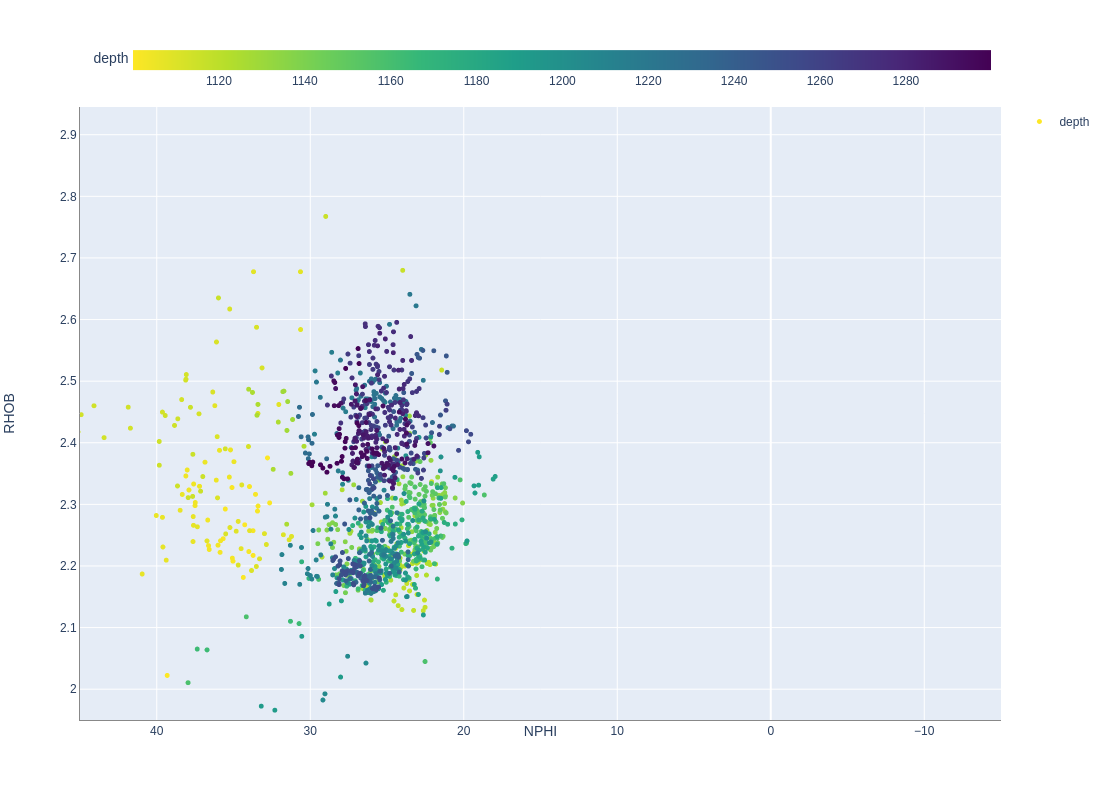

In [19]:
go.Figure(graph.CrossPlot(
    x = graph.get_trace("NPHI"),
    y = graph.get_trace("RHOB"),
    colors = ["depth"],
    xrange=(45, -15),
    yrange=(1.95, 2.945),
    size=800,
    depth_range=(1100, 1300),
).render())